In [1]:
import pandas as pd

df = pd.read_csv('datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df['parental level of education'].drop_duplicates()

0      bachelor's degree
1           some college
2        master's degree
3     associate's degree
8            high school
15      some high school
Name: parental level of education, dtype: object

In [3]:
df['test preparation course'].drop_duplicates()

0         none
1    completed
Name: test preparation course, dtype: object

In [4]:
# Splitting the data into groups based on some criteria.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
groups = df.groupby(by=['parental level of education', 'test preparation course'])
print(type(groups))
print(len(groups))
groups_list = [g for g in groups]
print([type(e) for e in groups_list[0]])
groups_list[0]

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
12
[<class 'tuple'>, <class 'pandas.core.frame.DataFrame'>]


(("associate's degree", 'completed'),
      gender race/ethnicity parental level of education         lunch  \
 35     male        group E          associate's degree      standard   
 38   female        group D          associate's degree  free/reduced   
 46   female        group A          associate's degree      standard   
 48   female        group D          associate's degree  free/reduced   
 51     male        group E          associate's degree  free/reduced   
 ..      ...            ...                         ...           ...   
 898    male        group D          associate's degree      standard   
 918  female        group C          associate's degree      standard   
 928    male        group E          associate's degree  free/reduced   
 932    male        group D          associate's degree  free/reduced   
 934    male        group C          associate's degree      standard   
 
     test preparation course  math score  reading score  writing score  
 35        

In [5]:
groups.describe()

math score             \
                                                         count       mean   
parental level of education test preparation course                         
associate's degree          completed                     82.0  71.829268   
                            none                         140.0  65.571429   
bachelor's degree           completed                     46.0  73.282609   
                            none                          72.0  66.902778   
high school                 completed                     56.0  65.000000   
                            none                         140.0  60.992857   
master's degree             completed                     20.0  70.600000   
                            none                          39.0  69.307692   
some college                completed                     77.0  71.454545   
                            none                         149.0  64.892617   
some high school            completed                     77.0  66.701299   
                            none                         102.0  61.078431   

                                                                             \
                                                           std   min    25%   
parental level of education test preparation course                           
associate's degree          completed                14.347370  40.0  61.25   
                            none                     15.118783  26.0  53.00   
bachelor's degree           completed                15.252924  39.0  66.00   
                            none                     14.298783  29.0  59.00   
high school                 completed                12.999301  23.0  57.00   
                            none                     15.002876   8.0  52.00   
master's degree             completed                14.615781  46.0  60.25   
                            none                     15.592093  40.0  54.50   
some college                completed                13.899589  42.0  63.00   
                            none                     14.052095  19.0  58.00   
some high school            completed                14.583755  29.0  59.00   
                            none                     16.533007   0.0  49.00   

                                                                         \
                                                      50%    75%    max   
parental level of education test preparation course                       
associate's degree          completed                71.0  82.00  100.0   
                            none                     65.0  77.75  100.0   
bachelor's degree           completed                72.5  84.50  100.0   
                            none                     65.5  77.25  100.0   
high school                 completed                67.0  73.25   88.0   
                            none                     62.0  71.00   99.0   
master's degree             completed                71.0  81.75   94.0   
                            none                     73.0  81.00   95.0   
some college                completed                70.0  82.00  100.0   
                            none                     65.0  74.00  100.0   
some high school            completed                65.0  77.00   97.0   
                            none                     64.0  73.00   94.0   

                                                    reading score             \
                                                            count       mean   
parental level of education test preparation course                            
associate's degree          completed                        82.0  76.170732   
                            none                            140.0  67.857143   
bachelor's degree           completed                        46.0  76.739130   
                            none                             72.0  70.611111   
high school             

In [6]:
df_groups_mean = groups.mean()
df_groups_mean

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    76.817073  
                            none                         65.842857  
bachelor's degree           completed                    78.695652  
                            none                         69.986111  
high school                 completed                    68.053571  
                            none                         60.207143  
master's degree             completed                    80.100000  
                            none                         73.410256  
some college                completed                    76.519481  
                            none                         64.872483  
some high school            completed                    70.363636  
                            none                         60.754902

In [7]:
# Cython-optimized aggregation functions
# Some common aggregations, currently only sum, mean, std, and sem, have optimized Cython implementations:
import numpy as np
groups.agg({'math score': 'mean', 'reading score': min, 'writing score': np.std})

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                           43   
                            none                                31   
bachelor's degree           completed                           42   
                            none                                41   
high school                 completed                           41   
                            none                                24   
master's degree             completed                           42   
                            none                                53   
some college                completed                           47   
                            none                                23   
some high school            completed                           37   
                            none                                17   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    12.681403  
                            none                         13.678882  
bachelor's degree           completed                    13.283021  
                            none                         14.684948  
high school                 completed                    13.191484  
                            none                         13.848355  
master's degree             completed                    13.606887  
                            none                         13.402117  
some college                completed                    11.566297  
                            none                         15.079648  
some high school            completed                    13.480892  
                            none                         16.110655

In [8]:
df_groups_mean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ("associate's degree", 'completed') to ('some high school', 'none')
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   math score     12 non-null     float64
 1   reading score  12 non-null     float64
 2   writing score  12 non-null     float64
dtypes: float64(3)
memory usage: 764.0+ bytes


<AxesSubplot:xlabel='parental level of education,test preparation course'>

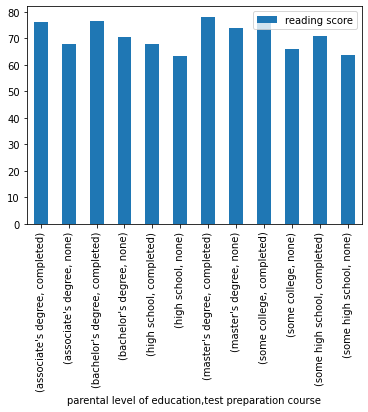

In [17]:
df_groups_mean.plot.bar(y='reading score')

In [10]:
df.head()# .pivot(index='parental level of education', columns='gender', values=['math score', 'reading score', 'writing score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df_pivot = pd.pivot_table(df, values=['math score', 'reading score', 'writing score'], index=['parental level of education', 'test preparation course'], aggfunc='mean')
df_pivot

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    76.817073  
                            none                         65.842857  
bachelor's degree           completed                    78.695652  
                            none                         69.986111  
high school                 completed                    68.053571  
                            none                         60.207143  
master's degree             completed                    80.100000  
                            none                         73.410256  
some college                completed                    76.519481  
                            none                         64.872483  
some high school            completed                    70.363636  
                            none                         60.754902

<AxesSubplot:xlabel='parental level of education,test preparation course'>

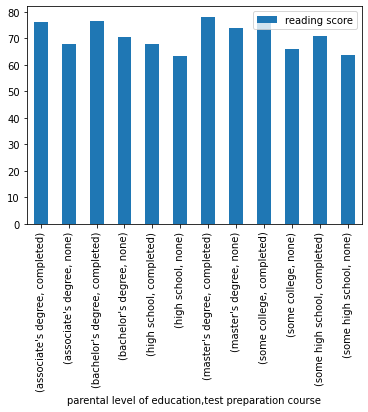

In [12]:
df_pivot.plot.bar(y='reading score')

In [13]:
df_pivot

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    76.817073  
                            none                         65.842857  
bachelor's degree           completed                    78.695652  
                            none                         69.986111  
high school                 completed                    68.053571  
                            none                         60.207143  
master's degree             completed                    80.100000  
                            none                         73.410256  
some college                completed                    76.519481  
                            none                         64.872483  
some high school            completed                    70.363636  
                            none                         60.754902

In [25]:
from pandas import testing
testing.assert_frame_equal(df_groups_mean, df_pivot)

In [26]:
testing.assert_frame_equal(df_groups_mean, df_pivot.reset_index())

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (12, 3)
[right]: (12, 5)

In [18]:
df_groups_mean

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    76.817073  
                            none                         65.842857  
bachelor's degree           completed                    78.695652  
                            none                         69.986111  
high school                 completed                    68.053571  
                            none                         60.207143  
master's degree             completed                    80.100000  
                            none                         73.410256  
some college                completed                    76.519481  
                            none                         64.872483  
some high school            completed                    70.363636  
                            none                         60.754902

In [14]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 70 else 'green'
    return 'color: %s' % color

df_pivot.style.applymap(color_negative_red)

In [15]:
df_pivot.style.applymap(color_negative_red).to_excel('styled.xlsx', engine='openpyxl')